In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model
import sklearn.model_selection
import pickle
import matplotlib.pyplot as pyplot
from matplotlib import style

In [2]:
cols=["time","rounds"]
data=pd.read_csv("data.csv",names=cols,sep=";")
data.head()


,time,rounds
0,15.09,1.22
1,15.09,1.15
2,15.09,1.07
3,15.09,2.68
4,15.08,4.00


In [3]:
data[["time", "rounds"]]

,time,rounds
0,15.09,1.22
1,15.09,1.15
2,15.09,1.07
3,15.09,2.68
4,15.08,4.00
...,...,...
9995,3.55,1.02
9996,3.54,2.10
9997,3.54,8.28
9998,3.53,103.50


In [4]:
data[["time"]]

,time
0,15.09
1,15.09
2,15.09
3,15.09
4,15.08
...,...
9995,3.55
9996,3.54
9997,3.54
9998,3.53


In [5]:
data["rounds"]

0         1.22
1         1.15
2         1.07
3         2.68
4         4.00
         ...  
9995      1.02
9996      2.10
9997      8.28
9998    103.50
9999      1.50
Name: rounds, Length: 10000, dtype: float64

In [6]:
        #"""xData=data["time"]
        #print(xData)
        #for x in xData:
        #    line = x.replace(":",".")
        #    data["time"]=line
        #xData=data["time"].astype(float)"""

xData=data["time"]
xData=xData
print(xData)


0       15.09
1       15.09
2       15.09
3       15.09
4       15.08
        ...  
9995     3.55
9996     3.54
9997     3.54
9998     3.53
9999     3.52
Name: time, Length: 10000, dtype: float64


In [7]:
yData=data["rounds"]
yData=yData
print(yData)

0         1.22
1         1.15
2         1.07
3         2.68
4         4.00
         ...  
9995      1.02
9996      2.10
9997      8.28
9998    103.50
9999      1.50
Name: rounds, Length: 10000, dtype: float64


In [8]:
x = np.array(xData)
y = np.array(yData)
y = y.reshape(-1, 1)
x = x.reshape(-1, 1)
print(x)
x_train,x_test ,y_train,y_test = sklearn.model_selection.train_test_split(x, y,test_size=0.1)

[[15.09]
 [15.09]
 [15.09]
 ...
 [ 3.54]
 [ 3.53]
 [ 3.52]]


In [9]:
print(y)

[[  1.22]
 [  1.15]
 [  1.07]
 ...
 [  8.28]
 [103.5 ]
 [  1.5 ]]


In [10]:
best=0
for _ in range(10000):
    x_train,x_test ,y_train,y_test = sklearn.model_selection.train_test_split(x, y,test_size=0.2)
    linear = linear_model.LinearRegression()
    Bcc = linear.fit(x_train,y_train)
    acc = linear.score(x_test,y_test)
    
    
    if acc > best:
        best=acc
        with open("aviatorlinearmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
    

In [11]:

pickle_in = open("aviatorlinearmodel.pickle", "rb")
linear = pickle.load(pickle_in)
print("curent %", acc)
print("best %", best)


curent % -0.028532596855965542
best % 0.0011592368200380454


In [12]:
print(linear.coef_)
print(linear.intercept_)

[[0.2721442]]
[8.71206905]


In [13]:
predictions = linear.predict(y_test)

for i in range(len(predictions)):
    print( "the prediction :", predictions[i],"actual :",y_test[i],"time :",x_test[i])

the prediction : [9.01142767] actual : [1.1] time : [7.52]
the prediction : [9.7979244] actual : [3.99] time : [12.15]
the prediction : [9.24819312] actual : [1.97] time : [7.25]
the prediction : [9.53122309] actual : [3.01] time : [9.5]
the prediction : [9.41692252] actual : [2.59] time : [13.13]
the prediction : [10.40752741] actual : [6.23] time : [7.56]
the prediction : [9.70811682] actual : [3.66] time : [21.2]
the prediction : [9.19104284] actual : [1.76] time : [14.04]
the prediction : [14.94144977] actual : [22.89] time : [2.44]
the prediction : [9.49040146] actual : [2.86] time : [20.52]
the prediction : [9.24275024] actual : [1.95] time : [14.21]
the prediction : [11.03618051] actual : [8.54] time : [9.4]
the prediction : [10.85112246] actual : [7.86] time : [20.38]
the prediction : [9.03047776] actual : [1.17] time : [1.27]
the prediction : [11.39541085] actual : [9.86] time : [17.49]
the prediction : [9.18015707] actual : [1.72] time : [13.08]
the prediction : [10.8538439] 

In [14]:
print("the right ",y_test[i],x_test[i])

the right  [1.36] [14.18]


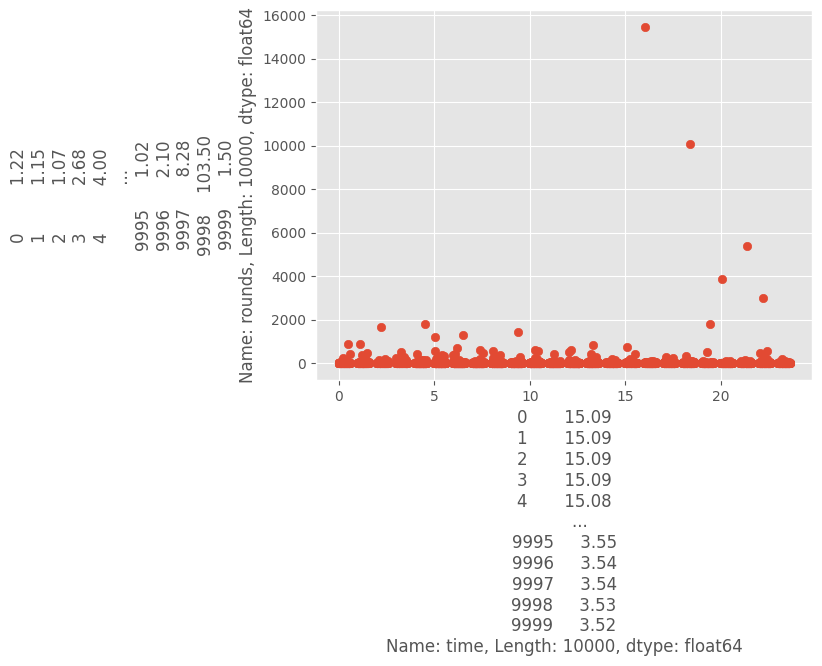

In [15]:
style.use("ggplot")
pyplot.scatter(xData, yData)
pyplot.xlabel(xData)
pyplot.ylabel(yData)
pyplot.show()